In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<center><h1>Smoothing (EHMA metod)</h1></center>

In [2]:
import pandas as pd
# Za filtriranje podataka
import pandas_ta as ta

In [3]:
# Učitavamo podatke u DataFrame i provjeravamo
data = pd.read_csv('covid19_data_preprocessed.csv', index_col=0)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 1/22/20 to 8/4/21
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   confirmed_daily       561 non-null    float64
 1   confirmed_cumulative  561 non-null    int64  
 2   deaths_daily          561 non-null    float64
 3   deaths_cumulative     561 non-null    int64  
 4   recovered_daily       561 non-null    float64
 5   recovered_cumulative  561 non-null    int64  
 6   prevalence_daily      561 non-null    int64  
 7   incidence_rate        561 non-null    float64
 8   mortality             561 non-null    float64
 9   cfr_daily             561 non-null    float64
 10  cfr_cumulative        561 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 52.6+ KB


,confirmed_daily,confirmed_cumulative,deaths_daily,deaths_cumulative,recovered_daily,recovered_cumulative,prevalence_daily,incidence_rate,mortality,cfr_daily,cfr_cumulative
1/22/20,557.0,557,17.0,17,30.0,30,510,0.01,0.0,3.05,3.05
1/23/20,100.0,657,1.0,18,2.0,32,607,0.00,0.0,1.00,2.74
1/24/20,287.0,944,8.0,26,7.0,39,879,0.00,0.0,2.79,2.75
1/25/20,493.0,1437,16.0,42,3.0,42,1353,0.01,0.0,3.25,2.92
1/26/20,683.0,2120,14.0,56,14.0,56,2008,0.01,0.0,2.05,2.64


In [4]:
# Iz ove tabele neće nam biti potrebne neke kolone (koje su poslužile samo za proračune), pa ćemo ih izbaciti.
# To su kumulativne vrijednosti potvrđenih, umrlih i oporavljenih.
data.drop(['confirmed_cumulative', 'deaths_cumulative', 'recovered_cumulative'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 1/22/20 to 8/4/21
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   confirmed_daily   561 non-null    float64
 1   deaths_daily      561 non-null    float64
 2   recovered_daily   561 non-null    float64
 3   prevalence_daily  561 non-null    int64  
 4   incidence_rate    561 non-null    float64
 5   mortality         561 non-null    float64
 6   cfr_daily         561 non-null    float64
 7   cfr_cumulative    561 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 39.4+ KB


In [5]:
# Sada primjenjujemo filtriranje. Uradićemo ga tako što ćemo dodati nove kolone sa sufiksom "_ehma", gdje će se
# nalaziti nove, filtrirane vrijednosti.
# Primjenjujemo EHMA metod.

# Kreiramo funkciju za filtriranje.
# Ključni parametar je lenght - on označava broj prethodnih vrijednosti koje uključujemo u proračun sredine.
# Ako ga ne unesemo, ostaje default 10, što je identično defaultu kod pandas_ta.ema() funkcije.
def smooth_with_ehma(df, columns, length=10):
    for column in columns:
        # EHMA za jednu kolonu.
        ehma = ta.ema(df[column], length=length, offset=-length).ewm(halflife=length).mean()
        # Filtrirana kolona se dodaje tabeli
        df[column + '_ehma'] = ehma
    return df

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 1/22/20 to 8/4/21
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   confirmed_daily        561 non-null    float64
 1   deaths_daily           561 non-null    float64
 2   recovered_daily        561 non-null    float64
 3   prevalence_daily       561 non-null    int64  
 4   incidence_rate         561 non-null    float64
 5   mortality              561 non-null    float64
 6   cfr_daily              561 non-null    float64
 7   cfr_cumulative         561 non-null    float64
 8   confirmed_daily_ehma   561 non-null    float64
 9   deaths_daily_ehma      561 non-null    float64
 10  recovered_daily_ehma   561 non-null    float64
 11  prevalence_daily_ehma  561 non-null    float64
 12  incidence_rate_ehma    561 non-null    float64
 13  mortality_ehma         561 non-null    float64
 14  cfr_daily_ehma         561 non-null    float64
 15  cf

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

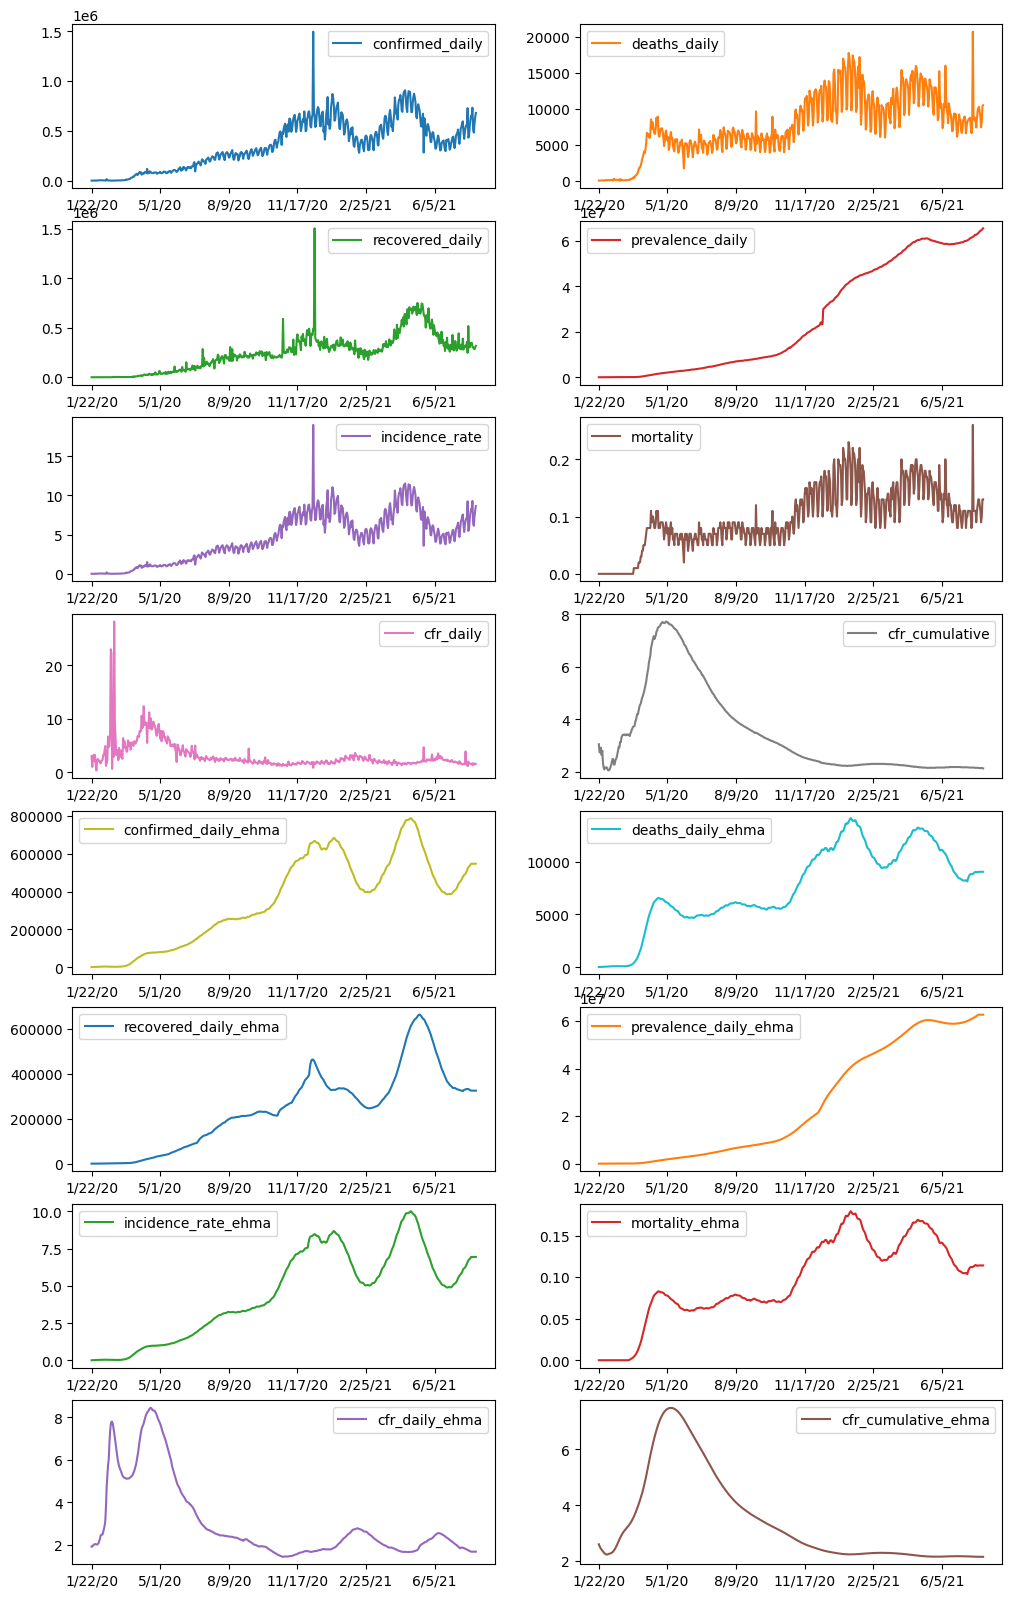

In [6]:
# Primjenjujemo funkciju na DataFrame
smoothed_df = smooth_with_ehma(data, data.columns, length=7)

# Provjeramo rezultat
smoothed_df.info()

# Grafički prikaz
smoothed_df.plot(subplots=True, layout=(8, 2), figsize=(12, 20), sharex=False)

In [7]:
# Izbacujemo nefiltrirane kolone
smoothed_df.drop(smoothed_df.iloc[:, 0:8], axis=1, inplace=True)
smoothed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 1/22/20 to 8/4/21
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   confirmed_daily_ehma   561 non-null    float64
 1   deaths_daily_ehma      561 non-null    float64
 2   recovered_daily_ehma   561 non-null    float64
 3   prevalence_daily_ehma  561 non-null    float64
 4   incidence_rate_ehma    561 non-null    float64
 5   mortality_ehma         561 non-null    float64
 6   cfr_daily_ehma         561 non-null    float64
 7   cfr_cumulative_ehma    561 non-null    float64
dtypes: float64(8)
memory usage: 55.6+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 1/22/20 to 8/4/21
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   confirmed_daily_ehma   561 non-null    float64
 1   deaths_daily_ehma      561 non-null    float64
 2   recovered_daily_ehma   561 non-null    float64
 3   prevalence_daily_ehma  561 non-null    float64
 4   incidence_rate_ehma    561 non-null    float64
 5   mortality_ehma         561 non-null    float64
 6   cfr_daily_ehma         561 non-null    float64
 7   cfr_cumulative_ehma    561 non-null    float64
dtypes: float64(8)
memory usage: 55.6+ KB


array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

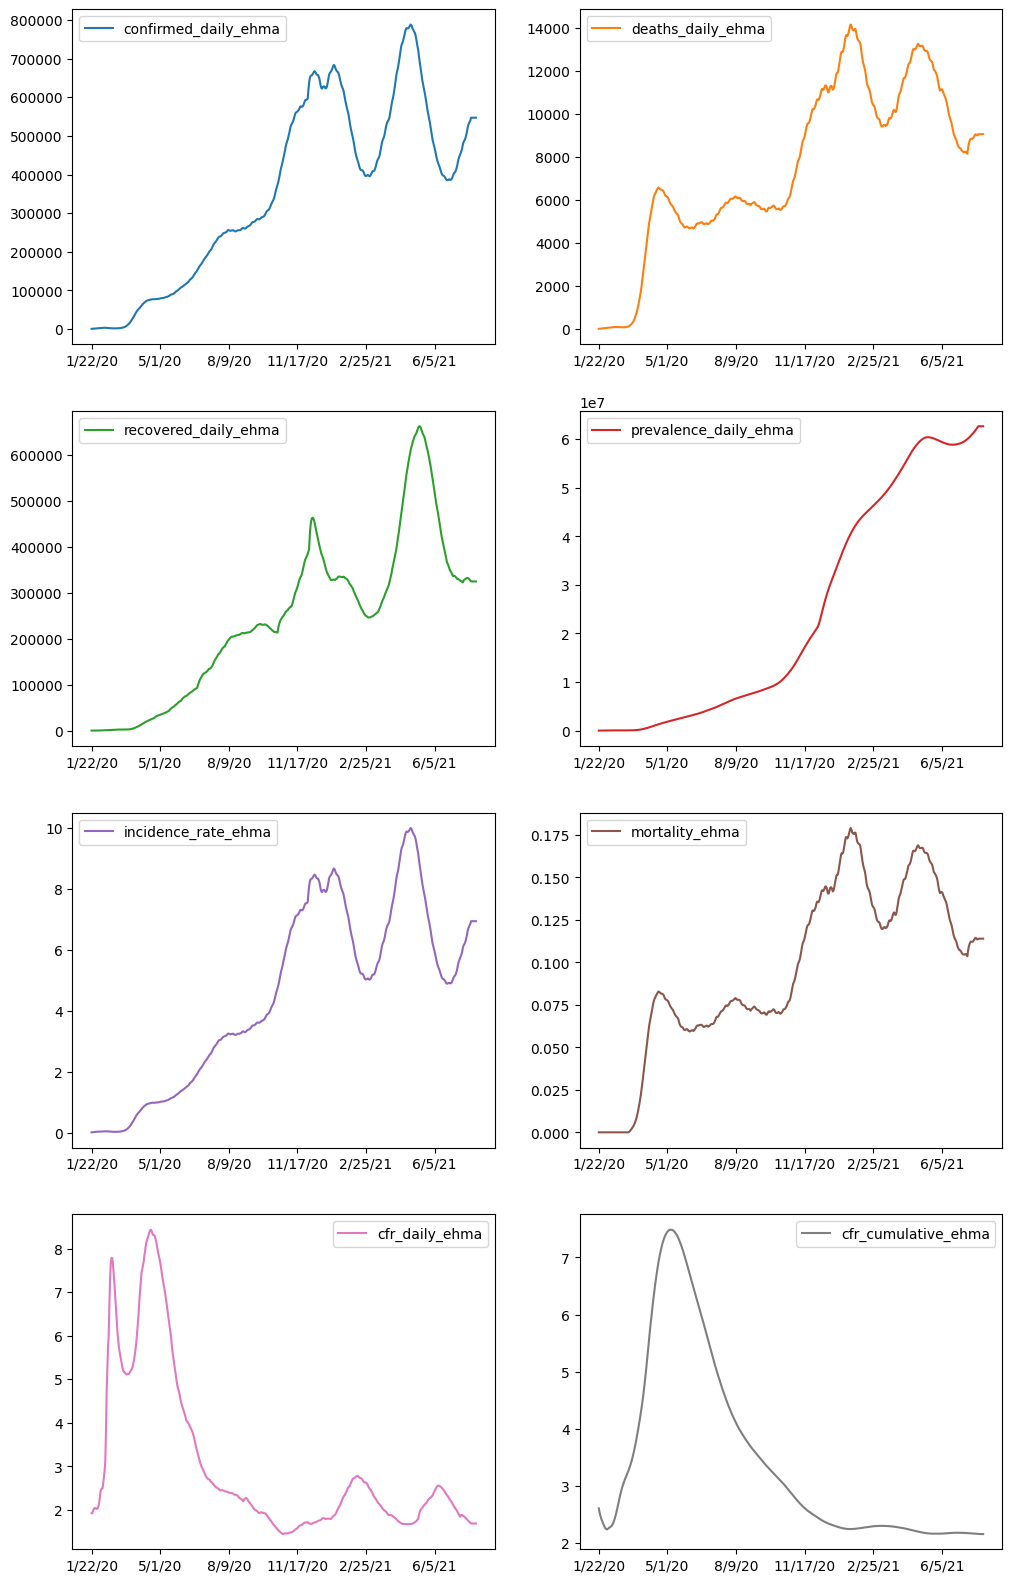

In [8]:
# Provjera
smoothed_df.info()
# Grafik
smoothed_df.plot(subplots=True, layout=(4, 2), figsize=(12, 20), sharex=False)

In [9]:
# Podaci su spremni za Posljednji korak - prognozu. Snimićemo ih kao fajl, pa nastavljamo u narednom notebook-u.
smoothed_df.to_csv('covid19_data_smoothed_ehma.csv')